## Unsupervised Learning

- Dimensionality Reduction & Visualization
    - PCA(Projection)
    - t-SNE(Manifold Learning)

- Clustering
    - K-Means
    - Hierarchical Clustering
    - DBSCAN


## PCA(Principal Component Analysis)

- 데이터셋을 회전해 만든 feature들이 통계적으로 상관관계가 없도록 만드는 방법  
-> 기존 feature들 사이 겹치는 정보를 제거하여 차원을 줄임

- 새로 만들어진 feature들은 기존 feature들의 선형결합들로 이뤄지며, 원래 데이터의 대부분을 설명할 수 있음.

- 선형결합이 만들어내는 방향들을 principal components라 부름

### 처리 과정

- 각 축의 평균이 되는 지점을 찾고 그 점들의 교차점이 원점이 되게 축을 세움.

- 공분산 행렬 S를 계산  
-> 두 변수 간의 상관관계를 고려하면서 분산이 최대인 곳을 찾아야 하기 때문  

    $\bar{x} = \frac{1}{n}\sum^n_{i=1}x_i = 0$로 가정하면  

    $S = \frac{1}{n}\sum^n_{i=1}(x_i - \bar{x})(x_i-\bar{x})^T$

    S는 데이터의 모양을 나타내는 것이기에 가장 넓게 퍼져있는 방향을 알아야 투영이 가능   
- S의 고유벡터(eigenvector)와 고유값(eigenvalue)를 계산  

    $Su = \lambda u$

- 고유값이 큰 순으로 상위 r개의 고유벡터를 선택함

    $u_1, ..., u_r$

- 각 데이터포인트를 투영(projection)함

    $z_i = (z_{i1}, ..., z_{ir}), \ z_{ij} = u^T_jx_i$


### 수학적 증명

"어떤 방향으로 투영했을 때 분산이 최대가 되는가?"  

분산 계산을 편하게 하기 위해 데이터포인트들의 평균이 0이라 가정  

투영할 방향 벡터 $u_1$을 가정. 크기는 고려하지 않을 것이기 때문에 $u_1^Tu_1 = 1$이라 가정함.(길이가 1인 단위벡터)  

데이터포인트 $x_i$를 투영한 값은 $z_{i1} = u_1^Tx_i$  

분산을 구하면  

$Var(z_{.1}) = \frac{1}{n}\sum_{i=1}^n(z_{i1} - \bar{z_1})^2$  

$= \frac{1}{n}\sum_{i=1}^n(u_1^Tx_i - u_1^T\bar{x})^2$  

$\bar{x} = 0$이므로 $\frac{1}{n}\sum_{i=1}^n(u_1^Tx_i)^2$  

$u_1^T(\frac{1}{n}\sum_{i=1}^nx_ix_i^T)u_1 = u_1^TSu_1$ (공분산의 정의에 의해)  

$\underset{u_1}{max} \ u_1^TSu_1$  

$u_1^Tu_1 = 1$이므로 단위벡터의 제약 아래서 분산이 최대화되는 벡터를 구해야함.  

=> 라그랑주 승수 사용   


$L(u_1, \lambda_1) = u_1^TSu_1 + \lambda_1(1 - u_1^Tu_1)$  

u_1에 대해 미분하여 0이 되는 값 찾기  

$\nabla_{u_1}(u_1^TSu_1)$ = 0  

$Su_1 = \lambda_1u_1$  

-> $u_1$은 $S$의 고유벡터이고 $\lambda_1$은 고유값이어야 함  

때문에 분산이 가장 커질 때는 $u_1$이 고유벡터일 때임.

### 실습

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [2]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [3]:
pca= PCA(n_components=2)
pca.fit(X_train_scaled)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [4]:
X_train_pca=pca.transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

print("Original shape: {}".format(str(X_train_scaled.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

Original shape: (426, 30)
Reduced shape: (426, 2)


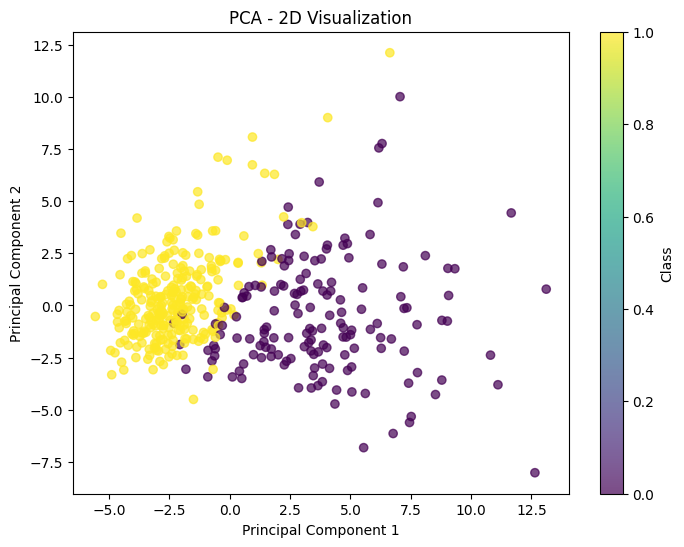

In [7]:
import matplotlib.pyplot as plt

# y_train이 레이블(클래스)라고 가정
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Visualization")
plt.colorbar(label="Class")
plt.show()

### PCA in Supervised Learning

- supervised learning에서도 전처리로 사용되기도 함

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


cancer = load_breast_cancer()
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [14]:
clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_scaled, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
y_train_hat= clf.predict(X_train_scaled)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

y_test_hat= clf.predict(X_test_scaled)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

Exception in thread Thread-48 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\Min\anaconda3\envs\ml_study\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "c:\Users\Min\anaconda3\envs\ml_study\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
  File "c:\Users\Min\anaconda3\envs\ml_study\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\Min\anaconda3\envs\ml_study\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "<frozen codecs>", line 322, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


train accuracy: 0.97653
test accuracy: 0.97203


In [16]:
pca= PCA(n_components=2)
pca.fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)

In [17]:
clf= KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train_pca, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [18]:
y_train_hat= clf.predict(X_train_pca)
print('train accuracy: %.5f'%accuracy_score(y_train, y_train_hat))

y_test_hat= clf.predict(X_test_pca)
print('test accuracy: %.5f'%accuracy_score(y_test, y_test_hat))

train accuracy: 0.95540
test accuracy: 0.92308


### PCA for Data Compression

- PCA로 압축한 데이터는 복원 역시 가능, 하지만 완벽한 원본 데이터로 돌아가지는 못함

    $\tilde{x} = \sum^r_{j=1}z_ju_j$

    
    $x = \sum^d_{j=1}a_ju_j$이면 
    $= \sum^d_{j=1} i-(x^Tu_j)u_j$

    $\sum_{j=1}^rz_ju_j + \sum_{j=r+1}^dz_ju_j$  


    따라서 근사함을 확인할 수 있음.

In [ ]:
# 505 compression
pca = PCA(n_components=15)
pca.fit(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
X_test_rec = pca.inverse_transform(X_test_pca)

X_test_scaled

array([[-0.37811061, -0.58413032, -0.37600132, ..., -0.50178242,
         0.24336209,  0.07959481],
       [ 1.11698205,  0.30724318,  1.08488351, ...,  1.239257  ,
         0.22651552,  0.05075882],
       [ 0.25245328, -0.04390396,  0.22507682, ...,  0.51723552,
         0.07642791,  0.03420482],
       ...,
       [-0.67769979, -0.04165302, -0.71462523, ..., -0.84477984,
         0.88046867, -0.77427099],
       [ 0.12120469, -1.89192831,  0.11123627, ...,  0.11826283,
        -0.03537204, -0.21463912],
       [-0.54074474, -0.3275228 , -0.57139311, ..., -0.82378912,
        -1.04922914, -0.55105904]], shape=(143, 30))

In [23]:
# 90% compression
pca = PCA(n_components=3)
pca.fit(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)
X_test_rec = pca.inverse_transform(X_test_pca)

X_test_rec

array([[-0.4689537 , -0.22323816, -0.45912929, ..., -0.15268673,
         0.18718422,  0.28287036],
       [ 0.88263194,  0.27149255,  0.88790323, ...,  0.90769019,
         0.49776683,  0.312061  ],
       [ 0.11052379, -0.05296329,  0.09413903, ...,  0.09530537,
         0.10899671, -0.04147401],
       ...,
       [-0.71017803, -0.3376356 , -0.73891513, ..., -0.76946588,
        -0.35305647, -0.38254133],
       [-0.13073632, -0.13887777, -0.13542945, ...,  0.03476187,
         0.20383596,  0.14878973],
       [-0.60431947, -0.19332633, -0.62333754, ..., -0.79489884,
        -0.53994186, -0.47955234]], shape=(143, 30))